In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
import nltk

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download thedevastator/tripadvisor-hotel-review-sentiment-analysis


Dataset URL: https://www.kaggle.com/datasets/thedevastator/tripadvisor-hotel-review-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/5.18M [00:00<?, ?B/s]
100% 5.18M/5.18M [00:00<00:00, 76.0MB/s]


In [ ]:
! unzip tripadvisor-hotel-review-sentiment-analysis.zip

Archive:  tripadvisor-hotel-review-sentiment-analysis.zip
  inflating: b.csv                   


In [ ]:
df = pd.read_csv ('b.csv' , encoding='ISO-8859-1')
df.head(10)

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5
5,6,love monaco staff husband stayed hotel crazy w...,5
6,7,cozy stay rainy city \thusband spent 7 nights ...,5
7,8,excellent staff \thousekeeping quality hotel c...,4
8,9,hotel stayed hotel monaco cruise \trooms gener...,5
9,10,excellent stayed hotel monaco past w/e delight...,5


In [ ]:
df.loc[6]

S.No.                                                     7
Review    cozy stay rainy city \thusband spent 7 nights ...
Rating                                                    5
Name: 6, dtype: object

In [ ]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

S.No.     0
Review    0
Rating    0
dtype: int64

In [ ]:
df = df.head(500)

In [ ]:
df.shape

(500, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

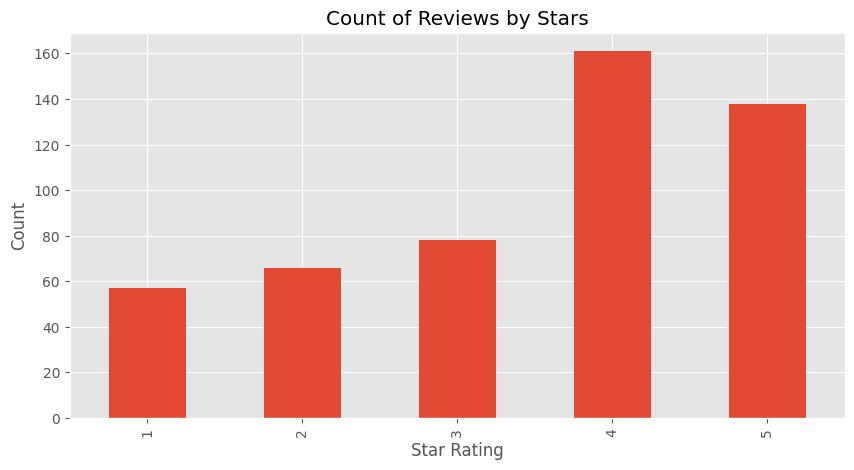

In [ ]:
ax= df['Rating'].value_counts().sort_index() \
      .plot(kind='bar', title = 'Count of Reviews by Stars',
            figsize =(10,5))

ax.set_xlabel ('Star Rating')
ax.set_ylabel ('Count')
plt.show

In [ ]:
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
example = df ['Review'] [6]
print (example)

cozy stay rainy city 	husband spent 7 nights monaco early january 2008. business trip chance come ride.we booked monte carlo suite proved comfortable longish stay 	room 905 located street building 	street noise not problem view interesting rooms building look dank alley midsection large office building 	suite comfortable plenty room spread 	bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas 	lots comfortable seating options good lighting plenty storage clothing luggage 	hotel staff friendly efficient 	housekeeping staff did great job pleasant 	requests responded quickly.the location quite good 	easy walk pike street market seattle art museum notch shopping dining options.a positive experience 	 


In [ ]:
tokens= nltk.word_tokenize (example)
tokens[:10]

['cozy',
 'stay',
 'rainy',
 'city',
 'husband',
 'spent',
 '7',
 'nights',
 'monaco',
 'early']

In [ ]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('cozy', 'NN'),
 ('stay', 'NN'),
 ('rainy', 'JJ'),
 ('city', 'NN'),
 ('husband', 'NN'),
 ('spent', 'VBD'),
 ('7', 'CD'),
 ('nights', 'NNS'),
 ('monaco', 'RB'),
 ('early', 'RB')]

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  cozy/NN
  stay/NN
  rainy/JJ
  city/NN
  husband/NN
  spent/VBD
  7/CD
  nights/NNS
  monaco/RB
  early/RB
  january/JJ
  2008./CD
  business/NN
  trip/NN
  chance/NN
  come/VBN
  ride.we/NN
  booked/VBN
  monte/JJ
  carlo/NNS
  suite/VBP
  proved/VBN
  comfortable/JJ
  longish/JJ
  stay/NN
  room/NN
  905/CD
  located/VBN
  street/NN
  building/VBG
  street/NN
  noise/RB
  not/RB
  problem/NN
  view/NN
  interesting/VBG
  rooms/NNS
  building/VBG
  look/NN
  dank/NN
  alley/NN
  midsection/NN
  large/JJ
  office/NN
  building/NN
  suite/NN
  comfortable/JJ
  plenty/NN
  room/NN
  spread/NN
  bathroom/NN
  attractive/JJ
  squeaky/JJ
  clean/JJ
  small/JJ
  comparison/NN
  generous/JJ
  proportions/NNS
  sitting/VBG
  sleeping/VBG
  areas/NNS
  lots/RBR
  comfortable/JJ
  seating/NN
  options/NNS
  good/JJ
  lighting/VBG
  plenty/JJ
  storage/NN
  clothing/NN
  luggage/JJ
  hotel/NN
  staff/NN
  friendly/JJ
  efficient/JJ
  housekeeping/VBG
  staff/NN
  did/VBD
  great/JJ
  job/NN


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

analyzer= SentimentIntensityAnalyzer ()

In [ ]:
analyzer.polarity_scores ("I am in pain" )


{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}

In [ ]:
analyzer.polarity_scores ("sea looks heavenly" )

{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.6124}

In [ ]:
result = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  review=row["Review"]
  myid= row["S.No."]
  result [myid]= analyzer.polarity_scores(review)


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders= pd.DataFrame(result).T
vaders= vaders.reset_index().rename(columns ={'index':'S.No.'})
vaders=vaders.merge(df, how='left')

In [ ]:
vaders.head()

,S.No.,neg,neu,pos,compound,Review,Rating
0,1,0.072,0.643,0.285,0.9747,nice hotel expensive parking got good deal sta...,4
1,2,0.110,0.701,0.189,0.9787,ok nothing special charge diamond member hilto...,2
2,3,0.081,0.700,0.219,0.9889,nice rooms not 4* experience hotel monaco seat...,3
3,4,0.060,0.555,0.385,0.9912,unique \tgreat stay \twonderful time hotel mon...,5
4,5,0.135,0.643,0.221,0.9797,great stay great stay \twent seahawk game awes...,5


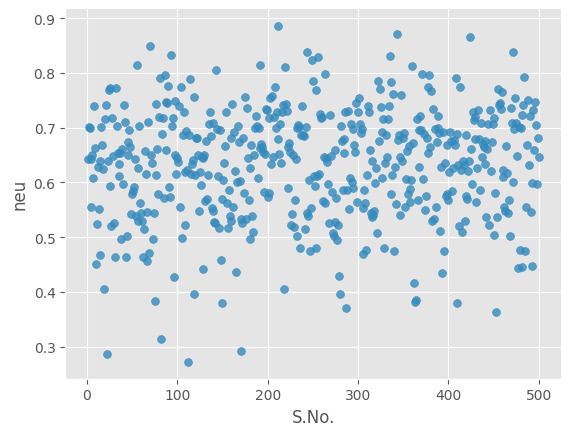

In [ ]:
# @title S.No. vs neg

from matplotlib import pyplot as plt
vaders.plot(kind='scatter', x='S.No.', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
analyzer.polarity_scores ("OMG this is something" )

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
analyzer.polarity_scores ("The food is heavenly" )

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6124}

In [ ]:
analyzer.polarity_scores ("I can't imagine coming back here" )

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
analyzer.polarity_scores ("The view is unsavory and lightless. Room service is unclean and sloppy" )

{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.4404}